# Rotate coordinates


This is a non standard GSLIB function developed by Adrian Martinez (Opengeostat) using as reference the rotation matrices defined in http://www.ccgalberta.com/ccgresources/report06/2004-403-angle_rotations.pdf

The resulting rotation is [-ZX-Y], that is: 

    Counter Clockwise along axis Z; Clockwise along axis X; Counter Clockwise along axis Y; 


## Importing python modules

In [1]:
%matplotlib inline
import pygslib      

#to plot in 2D and 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import pandas as pd

#numpy for matrix
import numpy as np

In [2]:
# to see user help
help (pygslib.gslib.rotscale)

Help on function rotscale in module pygslib.gslib:

rotscale(parameters)
    Rotates and rescales a set of 3D coordinates
    
    The new rotated and rescaled system of coordinates will have
    origin at [x = 0, y = 0, z = 0]. This point corresponds to
    [x0,y0,z0] (the pivot point) in the original system of coordinates.
    
    Parameters
    ----------
        parameters  :  dict
            dictionary with calculation parameters
    
    
    Parameters are pased in a dictionary as follows::
    
            parameters = {
                    'x'      :  mydata.x,# data x coordinates, array('f') with bounds (na), na is number of data points
                    'y'      :  mydata.y,# data y coordinates, array('f') with bounds (na)
                    'z'      :  mydata.z,# data z coordinates, array('f') with bounds (na)
                    'x0'     :  0,       # pivot point coordinate X, 'f'
                    'y0'     :  0,       # pivot point coordinate Y, 'f'
               

# Creating some dummy data

In [3]:
#we have a vector pointing noth
mydata = pd.DataFrame ({'x': [0,20], 
                      'y': [0,20], 
                      'z': [0,20]})
print (mydata)


    x   y   z
0   0   0   0
1  20  20  20


    x   y   z    xr    yr    zr
0   0   0   0   0.0   0.0   0.0
1  20  20  20  20.0  20.0  20.0


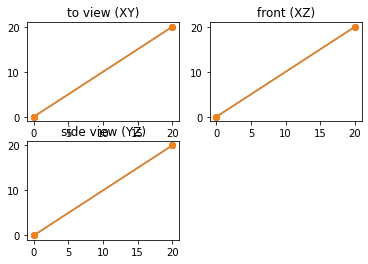

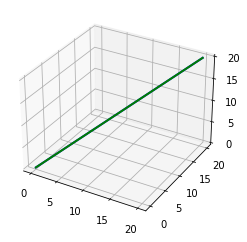

In [4]:
# No rotation at all

parameters = { 
                    'x'      :  mydata.x,     # data x coordinates, array('f') with bounds (na), na is number of data points
                    'y'      :  mydata.y,     # data y coordinates, array('f') with bounds (na)
                    'z'      :  mydata.z,     # data z coordinates, array('f') with bounds (na)
                    'x0'     :  0.,           # new X origin of coordinate , 'f' 
                    'y0'     :  0.,           # new Y origin of coordinate , 'f'
                    'z0'     :  0.,           # new Z origin of coordinate , 'f'
                    'ang1'   :  0.,           # Z  Rotation angle, 'f' 
                    'ang2'   :  0.,           # X  Rotation angle, 'f'
                    'ang3'   :  0.,           # Y  Rotation angle, 'f'
                    'anis1'  :  1.,           # Y cell anisotropy, 'f' 
                    'anis2'  :  1.,           # Z cell anisotropy, 'f' 
                    'invert' :  0}            # 0 do rotation, <> 0 invert rotation, 'i'

mydata['xr'],mydata['yr'],mydata['zr']  = pygslib.gslib.rotscale(parameters)

plt.subplot(2, 2, 1)
plt.plot(mydata.x, mydata.y, 'o-')
plt.plot(mydata.xr, mydata.yr, 'o-')
plt.title('to view (XY)')

plt.subplot(2, 2, 2)
plt.plot(mydata.x, mydata.z, 'o-')
plt.plot(mydata.xr, mydata.zr, 'o-')
plt.title('front (XZ)')

plt.subplot(2, 2, 3)
plt.plot(mydata.y, mydata.z, 'o-')
plt.plot(mydata.yr, mydata.zr, 'o-')
plt.title('side view (YZ)')

print (mydata)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot (mydata.x, mydata.y, mydata.z, linewidth=2, color= 'b')
ax.plot (mydata.xr, mydata.yr, mydata.zr, linewidth=2, color= 'g')

    x   y   z   xr     yr    zr
0   0   0   0  0.0   0.00   0.0
1  20  20  20  0.0  28.28  20.0


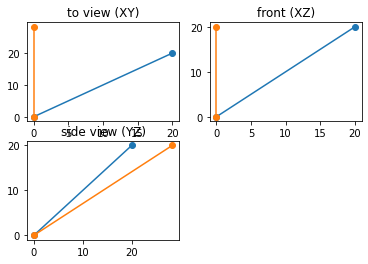

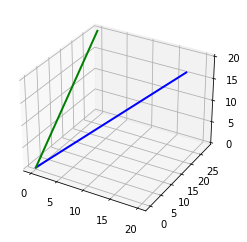

In [5]:
# Rotating azimuth 45 counter clockwise (Z unchanged)

parameters = { 
                    'x'      :  mydata.x,     # data x coordinates, array('f') with bounds (na), na is number of data points
                    'y'      :  mydata.y,     # data y coordinates, array('f') with bounds (na)
                    'z'      :  mydata.z,     # data z coordinates, array('f') with bounds (na)
                    'x0'     :  0.,           # new X origin of coordinate , 'f' 
                    'y0'     :  0.,           # new Y origin of coordinate , 'f'
                    'z0'     :  0.,           # new Z origin of coordinate , 'f'
                    'ang1'   :  45.,           # Z  Rotation angle, 'f' 
                    'ang2'   :  0.,           # X  Rotation angle, 'f'
                    'ang3'   :  0.,           # Y  Rotation angle, 'f'
                    'anis1'  :  1.,           # Y cell anisotropy, 'f' 
                    'anis2'  :  1.,           # Z cell anisotropy, 'f' 
                    'invert' :  0}            # 0 do rotation, <> 0 invert rotation, 'i'

mydata['xr'],mydata['yr'],mydata['zr']  = pygslib.gslib.rotscale(parameters)

plt.subplot(2, 2, 1)
plt.plot(mydata.x, mydata.y, 'o-')
plt.plot(mydata.xr, mydata.yr, 'o-')
plt.title('to view (XY)')

plt.subplot(2, 2, 2)
plt.plot(mydata.x, mydata.z, 'o-')
plt.plot(mydata.xr, mydata.zr, 'o-')
plt.title('front (XZ)')

plt.subplot(2, 2, 3)
plt.plot(mydata.y, mydata.z, 'o-')
plt.plot(mydata.yr, mydata.zr, 'o-')
plt.title('side view (YZ)')

print (np.round(mydata,2))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot (mydata.x, mydata.y, mydata.z, linewidth=2, color= 'b')
ax.plot (mydata.xr, mydata.yr, mydata.zr, linewidth=2, color= 'g')



    x   y   z    xr     yr   zr
0   0   0   0   0.0   0.00  0.0
1  20  20  20  20.0  28.28  0.0


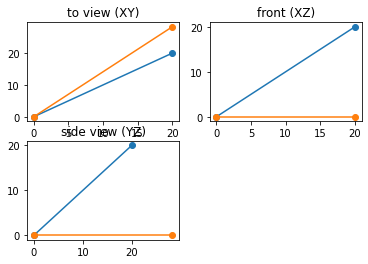

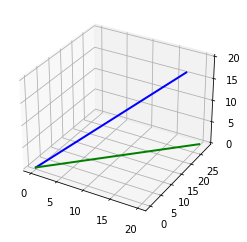

In [6]:
# Rotating clockwise 45 (X unchanged, this is a dip correction)
parameters = { 
                    'x'      :  mydata.x,     # data x coordinates, array('f') with bounds (na), na is number of data points
                    'y'      :  mydata.y,     # data y coordinates, array('f') with bounds (na)
                    'z'      :  mydata.z,     # data z coordinates, array('f') with bounds (na)
                    'x0'     :  0.,           # new X origin of coordinate , 'f' 
                    'y0'     :  0.,           # new Y origin of coordinate , 'f'
                    'z0'     :  0.,           # new Z origin of coordinate , 'f'
                    'ang1'   :  0.,           # Z  Rotation angle, 'f' 
                    'ang2'   :  45.,           # X  Rotation angle, 'f'
                    'ang3'   :  0.,           # Y  Rotation angle, 'f'
                    'anis1'  :  1.,           # Y cell anisotropy, 'f' 
                    'anis2'  :  1.,           # Z cell anisotropy, 'f' 
                    'invert' :  0}            # 0 do rotation, <> 0 invert rotation, 'i'

mydata['xr'],mydata['yr'],mydata['zr']  = pygslib.gslib.rotscale(parameters)

plt.subplot(2, 2, 1)
plt.plot(mydata.x, mydata.y, 'o-')
plt.plot(mydata.xr, mydata.yr, 'o-')
plt.title('to view (XY)')

plt.subplot(2, 2, 2)
plt.plot(mydata.x, mydata.z, 'o-')
plt.plot(mydata.xr, mydata.zr, 'o-')
plt.title('front (XZ)')

plt.subplot(2, 2, 3)
plt.plot(mydata.y, mydata.z, 'o-')
plt.plot(mydata.yr, mydata.zr, 'o-')
plt.title('side view (YZ)')

print (np.round(mydata,2))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot (mydata.x, mydata.y, mydata.z, linewidth=2, color= 'b')
ax.plot (mydata.xr, mydata.yr, mydata.zr, linewidth=2, color= 'g')

    x   y   z   xr    yr     zr
0   0   0   0  0.0   0.0   0.00
1  20  20  20  0.0  20.0  28.28


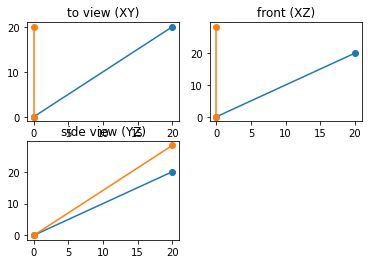

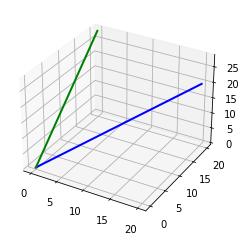

In [7]:
# Rotating counter clockwise 45 (Y unchanged, this is a plunge correction)
parameters = { 
                    'x'      :  mydata.x,     # data x coordinates, array('f') with bounds (na), na is number of data points
                    'y'      :  mydata.y,     # data y coordinates, array('f') with bounds (na)
                    'z'      :  mydata.z,     # data z coordinates, array('f') with bounds (na)
                    'x0'     :  0.,           # new X origin of coordinate , 'f' 
                    'y0'     :  0.,           # new Y origin of coordinate , 'f'
                    'z0'     :  0.,           # new Z origin of coordinate , 'f'
                    'ang1'   :  0.,           # Z  Rotation angle, 'f' 
                    'ang2'   :  0.,           # X  Rotation angle, 'f'
                    'ang3'   :  45.,           # Y  Rotation angle, 'f'
                    'anis1'  :  1.,           # Y cell anisotropy, 'f' 
                    'anis2'  :  1.,           # Z cell anisotropy, 'f' 
                    'invert' :  0}            # 0 do rotation, <> 0 invert rotation, 'i'

mydata['xr'],mydata['yr'],mydata['zr']  = pygslib.gslib.rotscale(parameters)

plt.subplot(2, 2, 1)
plt.plot(mydata.x, mydata.y, 'o-')
plt.plot(mydata.xr, mydata.yr, 'o-')
plt.title('to view (XY)')

plt.subplot(2, 2, 2)
plt.plot(mydata.x, mydata.z, 'o-')
plt.plot(mydata.xr, mydata.zr, 'o-')
plt.title('front (XZ)')

plt.subplot(2, 2, 3)
plt.plot(mydata.y, mydata.z, 'o-')
plt.plot(mydata.yr, mydata.zr, 'o-')
plt.title('side view (YZ)')

print (np.round(mydata,2))

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot (mydata.x, mydata.y, mydata.z, linewidth=2, color= 'b')
ax.plot (mydata.xr, mydata.yr, mydata.zr, linewidth=2, color= 'g')

In [8]:
# invert rotation

parameters = { 
                    'x'      :  mydata.x,     # data x coordinates, array('f') with bounds (na), na is number of data points
                    'y'      :  mydata.y,     # data y coordinates, array('f') with bounds (na)
                    'z'      :  mydata.z,     # data z coordinates, array('f') with bounds (na)
                    'x0'     :  0,           # new X origin of coordinate , 'f' 
                    'y0'     :  0,           # new Y origin of coordinate , 'f'
                    'z0'     :  0,           # new Z origin of coordinate , 'f'
                    'ang1'   :  0.,           # Y cell anisotropy, 'f' 
                    'ang2'   :  0.,           # Y cell anisotropy, 'f' 
                    'ang3'   :  45.,           # Y cell anisotropy, 'f' 
                    'anis1'  :  1.,           # Y cell anisotropy, 'f' 
                    'anis2'  :  1.,           # Z cell anisotropy, 'f' 
                    'invert' :  0}            # 0 do rotation, <> 0 invert rotation, 'i'

mydata['xr'],mydata['yr'],mydata['zr']  = pygslib.gslib.rotscale(parameters)

parameters = { 
                    'x'      :  mydata.xr,     # data x coordinates, array('f') with bounds (na), na is number of data points
                    'y'      :  mydata.yr,     # data y coordinates, array('f') with bounds (na)
                    'z'      :  mydata.zr,     # data z coordinates, array('f') with bounds (na)
                    'x0'     :  0,           # new X origin of coordinate , 'f' 
                    'y0'     :  0,           # new Y origin of coordinate , 'f'
                    'z0'     :  0,           # new Z origin of coordinate , 'f'
                    'ang1'   :  0.,           # Y cell anisotropy, 'f' 
                    'ang2'   :  0.,           # Y cell anisotropy, 'f' 
                    'ang3'   :  45.,           # Y cell anisotropy, 'f' 
                    'anis1'  :  1.,           # Y cell anisotropy, 'f' 
                    'anis2'  :  1.,           # Z cell anisotropy, 'f' 
                    'invert' :  1}            # 0 do rotation, <> 0 invert rotation, 'i'

mydata['xi'],mydata['yi'],mydata['zi']  = pygslib.gslib.rotscale(parameters)


print (np.round(mydata,2))



    x   y   z   xr    yr     zr    xi    yi    zi
0   0   0   0  0.0   0.0   0.00   0.0   0.0   0.0
1  20  20  20  0.0  20.0  28.28  20.0  20.0  20.0
